In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)
xgb = XGBRegressor()

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb),('XGB', xgb)], final_estimator=cb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            l...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd080f2f7f0>,
                  n_jobs=2, passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9913103466657734

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [9]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb), ('XGB', xgb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [10]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fd080f2f7f0>,
                  passthrough=True)

In [11]:
stacking_regressor4.score(X,y)

0.9915688535022917

In [12]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [13]:
scores4

{'fit_time': array([6.81143665, 6.82800484, 6.80400372, 6.81705713, 6.85750699]),
 'score_time': array([0.00545311, 0.00528312, 0.00586915, 0.0052309 , 0.00520396]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                                ('XGB',
                                 XGBRegressor(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                  

In [14]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [15]:
cat = evaluate_model(cb, X, y)

In [16]:
cat

,fit_time,score_time,test_score
0,7.566643,0.020631,0.920566
1,7.623679,0.009952,0.899820
2,5.433628,0.007076,0.938045
3,5.768485,0.005237,0.933383
4,7.786778,0.019646,0.949361
5,7.633019,0.011010,0.934502
6,7.518437,0.023027,0.944618
7,7.668257,0.023210,0.924652
8,4.350329,0.008343,0.947610
9,4.561513,0.003716,0.883656


In [17]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [18]:
cat

,cat_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [19]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [20]:
df4

,fit_time,score_time,test_score
0,46.159010,0.010170,0.919358
1,44.469201,0.016507,0.899054
2,45.754019,0.013561,0.929722
3,46.592977,0.009149,0.922569
4,45.515707,0.017716,0.942397
5,44.114551,0.014574,0.921012
6,45.033332,0.011383,0.939201
7,45.014623,0.014410,0.921632
8,39.747890,0.022911,0.944448
9,40.342256,0.005573,0.889240


In [21]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [22]:
df4

,test_score_4
0,0.919358
1,0.899054
2,0.929722
3,0.922569
4,0.942397
5,0.921012
6,0.939201
7,0.921632
8,0.944448
9,0.889240


In [23]:
combo = pd.concat([cat, df4], axis=1)

In [24]:
combo

,cat_score,test_score_4
0,0.920566,0.919358
1,0.899820,0.899054
2,0.938045,0.929722
3,0.933383,0.922569
4,0.949361,0.942397
5,0.934502,0.921012
6,0.944618,0.939201
7,0.924652,0.921632
8,0.947610,0.944448
9,0.883656,0.889240


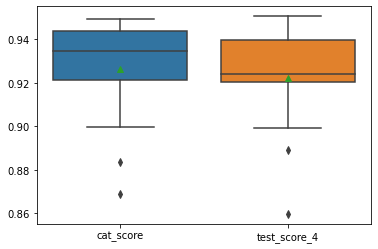

In [25]:
sns.boxplot(data=combo, showmeans=True);

In [26]:
combo.describe()

,cat_score,test_score_4
count,15.000000,15.000000
mean,0.926385,0.922357
std,0.024378,0.023955
min,0.868666,0.859654
25%,0.921228,0.920185
50%,0.934502,0.923930
75%,0.943737,0.939895
max,0.949361,0.950579
